0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
0.0 1.0


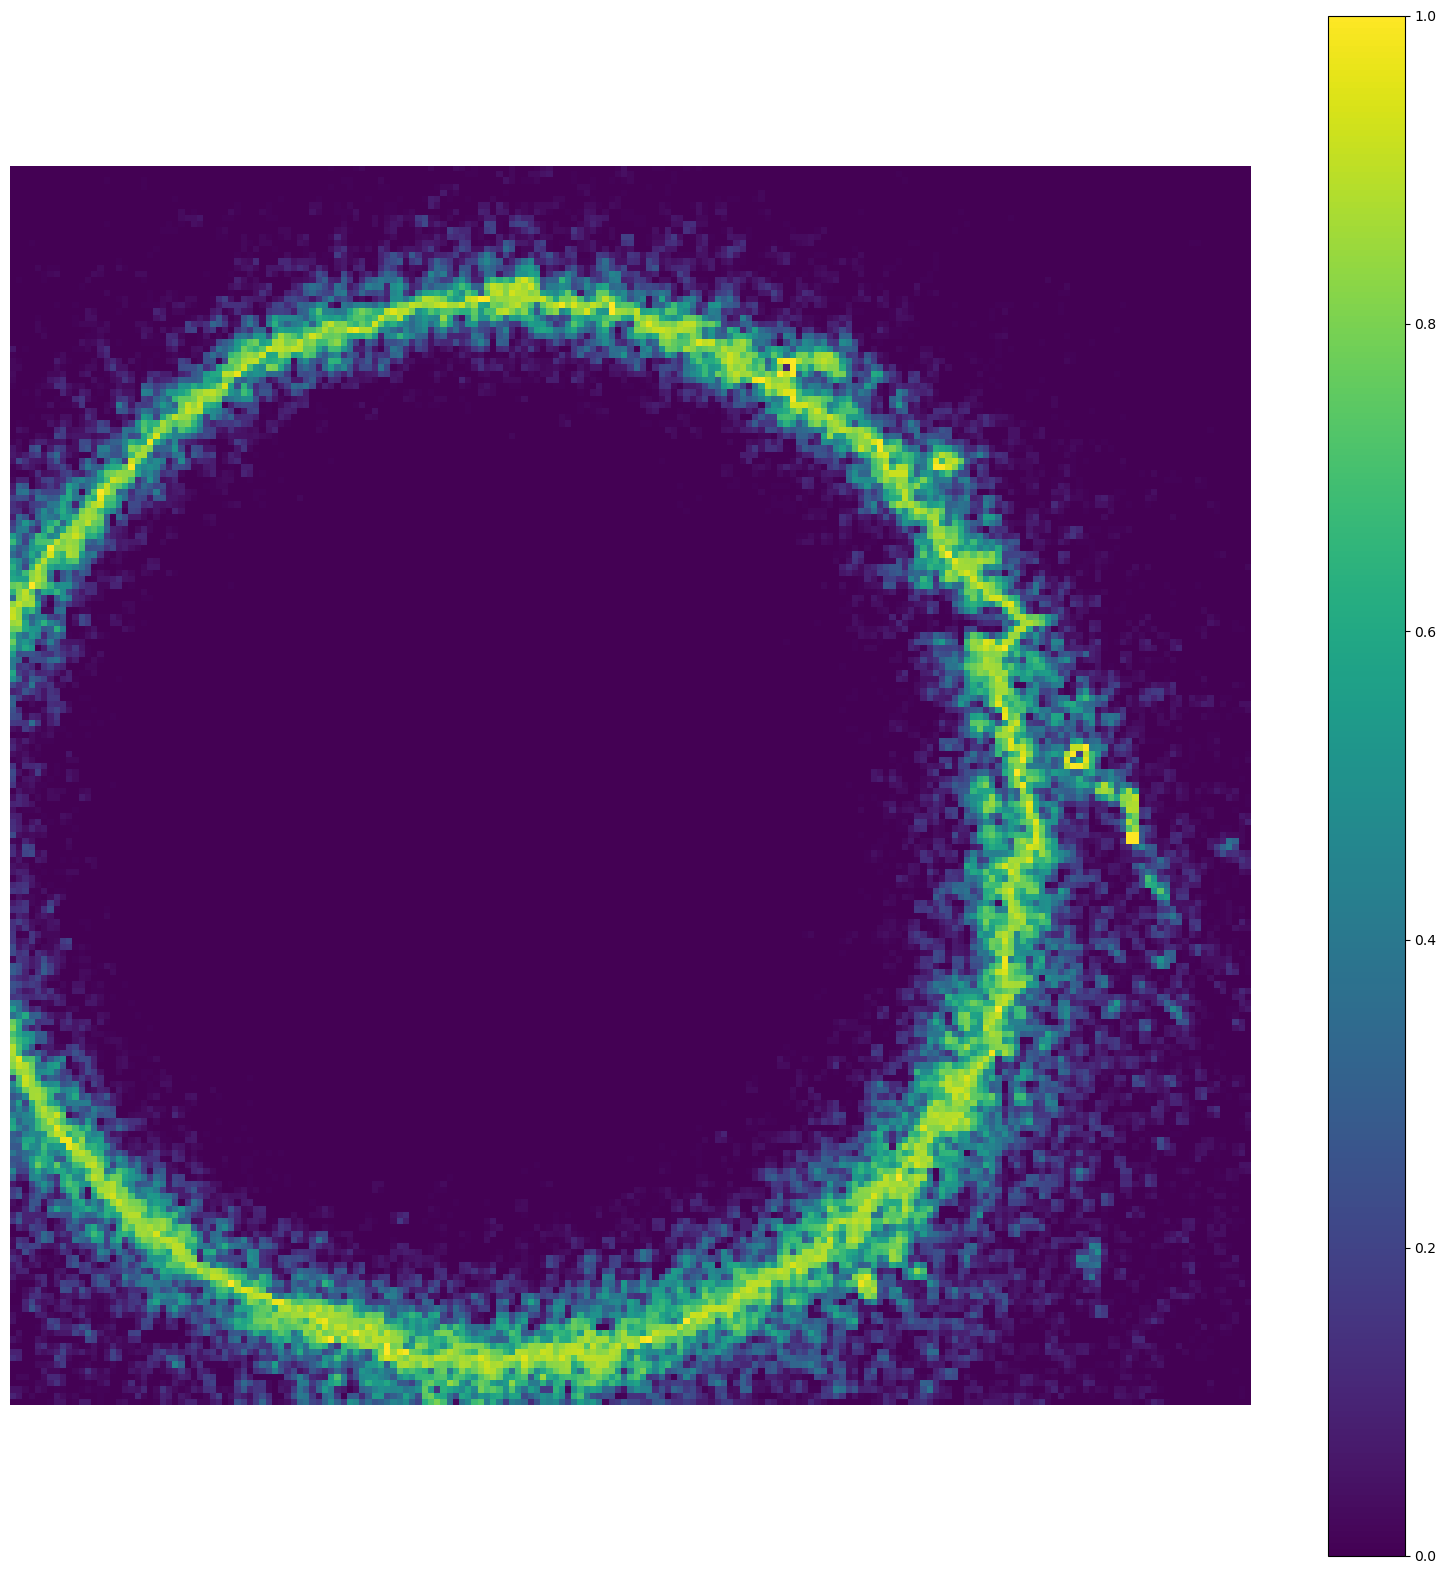

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data2D = 0
plot = 0
dataSd2D = 0


##### x, y: location. Return: mean and standard deviation to represent the data at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y], dataSd2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global plot
    global dataSd2D
    data2D = np.load("rawData.npy").transpose()
    dataSd2D = np.load("rawDataSd.npy").transpose()
    plot = np.zeros((data2D.shape[0]-1, data2D.shape[1]-1))

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')

##### (TODO) WORK on this function
##### compute and draw the uncertain isocontour of the given datavalue ("isovalue")
##### you should use "getDataVlue()" to get the data (Gaussian distribution) you want
##### Store the probability field in 'plot' to display
##### I do not mind the computation is efficnet or not
def computePlotIsoContour( isovalue ):
    sample_count = 100
    for x in range(199):
        print(x)
        for y in range(199):
            v0, s0 = getDataValue( x, y)
            v1, s1 = getDataValue( x+1, y)
            v2, s2 = getDataValue( x, y+1)
            v3, s3 = getDataValue( x+1, y+1)
            
            arr = np.zeros(4)
            cnt = 0
            for i in range(sample_count):
                arr[0] = np.random.normal(v0, s0)
                arr[1] = np.random.normal(v1, s1)
                arr[2] = np.random.normal(v2, s2)
                arr[3] = np.random.normal(v3, s3)
                if np.amin(arr) < isovalue and isovalue < np.amax(arr):
                    cnt = cnt + 1
            plot[x, y] = cnt / sample_count

    print(np.min(plot), np.max(plot) )
    plt.imshow(plot, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar()

##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0)

plt.show()